In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.linear_model import LinearRegression

In [23]:
df = pd.read_csv("dataTestwithout0.csv")

In [24]:
df.head()

,make,model,derivative,year,price,fuelType,mileage,sellerType,transmission,engineSize,color,manufacturerColor,condition,owners,taxBandCode
0,Mercedes-Benz,E Class,E 300De AMG Line Plus *MULTISPOKE ALLOYS*NIGHT...,2026,89900,Diesel Plug-in Hybrid,0,ContactTrade,Automatic,2.0,Black,Black,new,NaN,NaN
1,Mercedes-Benz,E Class,E 300De AMG Line Plus *MULTISPOKE ALLOYS*,2026,89500,Diesel Plug-in Hybrid,0,ContactTrade,Automatic,2.0,Black,Black,new,NaN,NaN
2,Mercedes-Benz,E Class,E 300De AMG Line *MULTISPOKE ALLOYS*NIGHT PACK...,2026,89500,Diesel Plug-in Hybrid,0,ContactTrade,Automatic,2.0,Silver,Silver,new,NaN,NaN
3,Mercedes-Benz,E Class,E 300De AMG Line Plus *Hyperscreen* 360 Camera...,2026,89495,Diesel Plug-in Hybrid,0,ContactTrade,Automatic,2.0,Black,Black,new,NaN,NaN
4,Mercedes-Benz,E Class,E 300 e AMG EDITION PLUS,2026,89367,Petrol Plug-in Hybrid,14,ContactTrade,Automatic,2.0,Grey,Graphite Grey Metallic,new,NaN,NaN


In [25]:
# inputs
x = df[["make", "model", "year", "mileage", "fuelType", "engineSize"]]
# output/target
y = df["price"]

In [27]:
# Normalise the input
x = df["mileage"]
x = (x - x.mean() / x.std())

In [28]:
def compute_cost(x, y, w, b):
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost 

In [29]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db
        
    

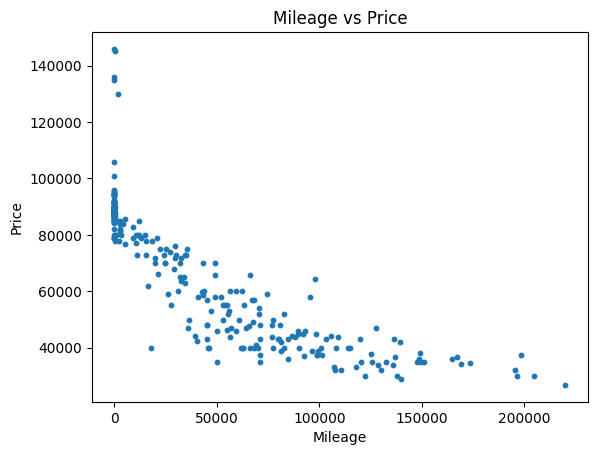

In [31]:
plt.scatter(x, y, s=10) 
plt.title("Mileage vs Price")
plt.xlabel("Mileage") 
plt.ylabel("Price")          
plt.show()

In [9]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [21]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 1000
tmp_alpha = .1
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_test_norm ,y, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
x_mean = x_test.mean()
x_std = x_test.std()
w_real = w_final / x_std
b_real = b_final - (w_final * x_mean / x_std)

print("w_real:", w_real)
print("b_real:", b_real)

Iteration    0: Cost 2.20e+09  dj_dw:  1.992e+04, dj_db: -6.984e+04   w: -1.992e+03, b: 6.98370e+03
Iteration  100: Cost 6.60e+07  dj_dw:  5.474e-01, dj_db: -1.855e+00   w: -1.998e+04, b: 6.98353e+04
Iteration  200: Cost 6.60e+07  dj_dw:  1.504e-05, dj_db: -4.927e-05   w: -1.998e+04, b: 6.98370e+04
Iteration  300: Cost 6.60e+07  dj_dw:  4.202e-10, dj_db: -1.308e-09   w: -1.998e+04, b: 6.98370e+04
Iteration  400: Cost 6.60e+07  dj_dw:  1.344e-11, dj_db: -5.997e-11   w: -1.998e+04, b: 6.98370e+04
Iteration  500: Cost 6.60e+07  dj_dw:  1.344e-11, dj_db: -5.997e-11   w: -1.998e+04, b: 6.98370e+04
Iteration  600: Cost 6.60e+07  dj_dw:  1.344e-11, dj_db: -5.997e-11   w: -1.998e+04, b: 6.98370e+04
Iteration  700: Cost 6.60e+07  dj_dw:  1.344e-11, dj_db: -5.997e-11   w: -1.998e+04, b: 6.98370e+04
Iteration  800: Cost 6.60e+07  dj_dw:  1.344e-11, dj_db: -5.997e-11   w: -1.998e+04, b: 6.98370e+04
Iteration  900: Cost 6.60e+07  dj_dw:  1.344e-11, dj_db: -5.997e-11   w: -1.998e+04, b: 6.98370e+04


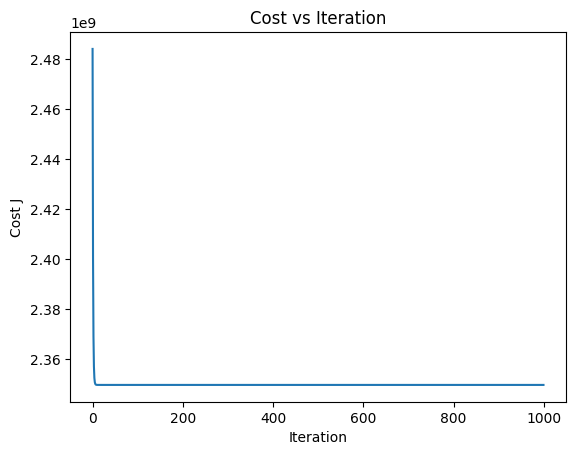

In [11]:
plt.plot(J_hist)
plt.xlabel("Iteration")
plt.ylabel("Cost J")
plt.title("Cost vs Iteration")
plt.show()

0.4292933106150444 0.005371186764351049


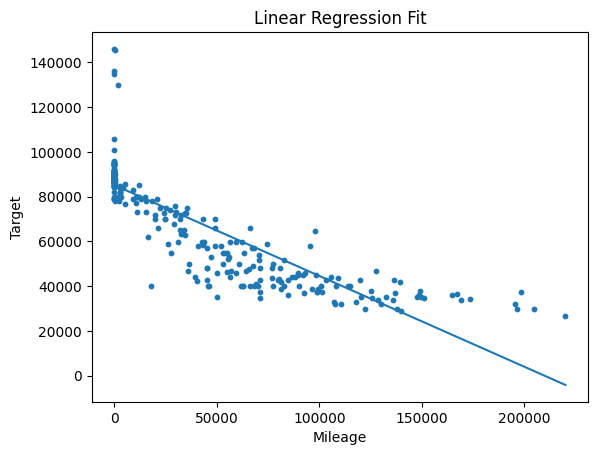

In [16]:
plt.scatter(x["mileage"], y, s=10)  # your data points

# predicted line
print(w_final, b_final)
w_final = -0.4054295741878886
b_final = 85105
y_pred = w_final * x["mileage"] + b_final
plt.plot(x["mileage"], y_pred)

plt.xlabel("Mileage")
plt.ylabel("Target")
plt.title("Linear Regression Fit")
plt.show()

In [15]:

# reshape to (m, 1)
X = x_test.values.reshape(-1, 1)
Y = y.values

model = LinearRegression()
model.fit(X, Y)

w = model.coef_[0]
b = model.intercept_
print(w, b)

-0.4054295741878886 85105.49346954082
